In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler

In [35]:
data = pd.read_csv('House_Rent_Dataset.csv')
data

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [36]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [37]:
data.drop('Posted On', axis = 1, inplace = True)
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [38]:
data.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [39]:
data['Floor'].unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [40]:
data.Floor.replace(to_replace='^G', value=0,regex=True, inplace=True)
data.Floor.replace(to_replace='^10', value=10,regex=True, inplace=True)
data.Floor.replace(to_replace='^11', value=11,regex=True, inplace=True)
data.Floor.replace(to_replace='^12', value=12,regex=True, inplace=True)
data.Floor.replace(to_replace='^13', value=13,regex=True, inplace=True)
data.Floor.replace(to_replace='^14', value=14,regex=True, inplace=True)
data.Floor.replace(to_replace='^15', value=15,regex=True, inplace=True)
data.Floor.replace(to_replace='^16', value=16,regex=True, inplace=True)
data.Floor.replace(to_replace='^17', value=17,regex=True, inplace=True)
data.Floor.replace(to_replace='^18', value=18,regex=True, inplace=True)
data.Floor.replace(to_replace='^19', value=19,regex=True, inplace=True)
data.Floor.replace(to_replace='^20', value=20,regex=True, inplace=True)
data.Floor.replace(to_replace='^21', value=21,regex=True, inplace=True)
data.Floor.replace(to_replace='^22', value=22,regex=True, inplace=True)
data.Floor.replace(to_replace='^23', value=23,regex=True, inplace=True)
data.Floor.replace(to_replace='^24', value=24,regex=True, inplace=True)
data.Floor.replace(to_replace='^25', value=25,regex=True, inplace=True)
data.Floor.replace(to_replace='^26', value=26,regex=True, inplace=True)
data.Floor.replace(to_replace='^27', value=27,regex=True, inplace=True)
data.Floor.replace(to_replace='^28', value=28,regex=True, inplace=True)
data.Floor.replace(to_replace='^29', value=29,regex=True, inplace=True)
data.Floor.replace(to_replace='^30', value=30,regex=True, inplace=True)
data.Floor.replace(to_replace='^31', value=31,regex=True, inplace=True)
data.Floor.replace(to_replace='^32', value=32,regex=True, inplace=True)
data.Floor.replace(to_replace='^33', value=33,regex=True, inplace=True)
data.Floor.replace(to_replace='^34', value=34,regex=True, inplace=True)
data.Floor.replace(to_replace='^35', value=35,regex=True, inplace=True)
data.Floor.replace(to_replace='^36', value=36,regex=True, inplace=True)
data.Floor.replace(to_replace='^37', value=37,regex=True, inplace=True)
data.Floor.replace(to_replace='^38', value=38,regex=True, inplace=True)
data.Floor.replace(to_replace='^39', value=39,regex=True, inplace=True)
data.Floor.replace(to_replace='^40', value=40,regex=True, inplace=True)
data.Floor.replace(to_replace='^41', value=41,regex=True, inplace=True)
data.Floor.replace(to_replace='^42', value=42,regex=True, inplace=True)
data.Floor.replace(to_replace='^43', value=43,regex=True, inplace=True)
data.Floor.replace(to_replace='^44', value=44,regex=True, inplace=True)
data.Floor.replace(to_replace='^45', value=45,regex=True, inplace=True)
data.Floor.replace(to_replace='^46', value=46,regex=True, inplace=True)
data.Floor.replace(to_replace='^47', value=47,regex=True, inplace=True)
data.Floor.replace(to_replace='^48', value=48,regex=True, inplace=True)
data.Floor.replace(to_replace='^49', value=49,regex=True, inplace=True)
data.Floor.replace(to_replace='^50', value=50,regex=True, inplace=True)
data.Floor.replace(to_replace='^51', value=51,regex=True, inplace=True)
data.Floor.replace(to_replace='^52', value=52,regex=True, inplace=True)
data.Floor.replace(to_replace='^53', value=53,regex=True, inplace=True)
data.Floor.replace(to_replace='^60', value=60,regex=True, inplace=True)
data.Floor.replace(to_replace='^65', value=65,regex=True, inplace=True)
data.Floor.replace(to_replace='^76', value=76,regex=True, inplace=True)
data.Floor.replace(to_replace='^1', value=1,regex=True, inplace=True)
data.Floor.replace(to_replace='^2', value=2,regex=True, inplace=True)
data.Floor.replace(to_replace='^3', value=3,regex=True, inplace=True)
data.Floor.replace(to_replace='^4', value=4,regex=True, inplace=True)
data.Floor.replace(to_replace='^5', value=5,regex=True, inplace=True)
data.Floor.replace(to_replace='^6', value=6,regex=True, inplace=True)
data.Floor.replace(to_replace='^7', value=7,regex=True, inplace=True)
data.Floor.replace(to_replace='^8', value=8,regex=True, inplace=True)
data.Floor.replace(to_replace='^9', value=9,regex=True, inplace=True)
data.Floor.replace(to_replace='^U', value=80,regex=True, inplace=True)
data.Floor.replace(to_replace='^L', value=-1,regex=True, inplace=True)

In [41]:
data['Floor'].unique()

array([ 0,  1,  2,  4,  3,  5,  7,  8, 80, 11, -1,  6, 14, 43, 13, 18, 17,
        9, 19, 60, 34, 12, 26, 25, 53, 16, 10, 39, 32, 47, 28, 20, 15, 65,
       40, 37, 22, 21, 30, 35, 33, 44, 41, 46, 27, 45, 48, 50, 24, 23, 29,
       49, 36, 76], dtype=int64)

In [42]:
le_Area_Type = LabelEncoder()
data['Area Type'] = le_Area_Type.fit_transform(data['Area Type'])

le_Area_Locality = LabelEncoder()
data['Area Locality'] = le_Area_Locality.fit_transform(data['Area Locality'])

le_City = LabelEncoder()
data['City'] = le_City.fit_transform(data['City'])

le_Furnishing_Status = LabelEncoder()
data['Furnishing Status'] = le_Furnishing_Status.fit_transform(data['Furnishing Status'])

le_Tenant_Preferred = LabelEncoder()
data['Tenant Preferred'] = le_Tenant_Preferred.fit_transform(data['Tenant Preferred'])

le_Point_of_Contact = LabelEncoder()
data['Point of Contact'] = le_Point_of_Contact.fit_transform(data['Point of Contact'])

data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,2,221,4,2,1,2,2
1,2,20000,800,1,2,1527,4,1,1,1,2
2,2,17000,1000,1,2,1760,4,1,1,1,2
3,2,10000,800,1,2,526,4,2,1,1,2
4,2,7500,850,1,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3,1,219,3,1,1,2,2
4742,3,29000,2000,1,2,1214,3,1,1,3,2
4743,3,35000,1750,3,1,724,3,1,1,3,0
4744,3,45000,1500,23,1,590,3,1,2,2,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1dd9adac410>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd9ca67a10>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dd9c13f550>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd9ca802d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd9acda0d0>],
 'means': []}

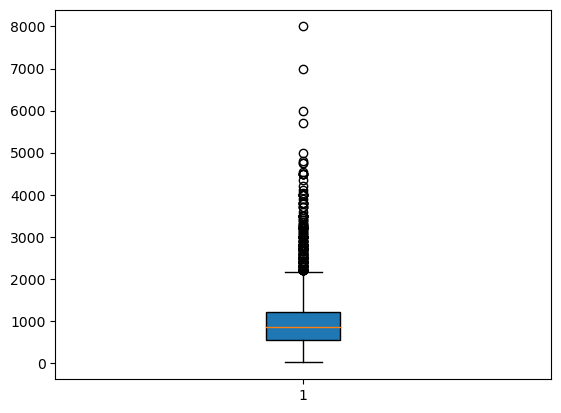

In [43]:
plt.boxplot(data['Size'], patch_artist=True)

In [44]:
Q1 = data['Size'].quantile(0.25)
Q3 = data['Size'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

upper_index = np.where(data['Size'] >= upper)[0]
lower_index = np.where(data['Size'] <= lower)[0]

data.drop(index = upper_index, inplace = True)
data.drop(index = lower_index, inplace = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd9ae6d2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd9caffa90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x1dd9cacaa50>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd9cb0cb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd9ca852d0>],
 'means': []}

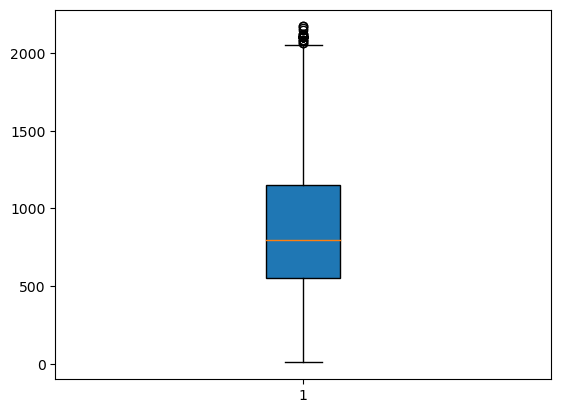

In [45]:
plt.boxplot(data['Size'], patch_artist=True)

In [46]:
data.reset_index(inplace = True)
data.drop('index', axis=1,inplace=True)

In [47]:
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0,2,221,4,2,1,2,2
1,2,20000,800,1,2,1527,4,1,1,1,2
2,2,17000,1000,1,2,1760,4,1,1,1,2
3,2,10000,800,1,2,526,4,2,1,1,2
4,2,7500,850,1,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4538,2,15000,1000,3,1,219,3,1,1,2,2
4539,3,29000,2000,1,2,1214,3,1,1,3,2
4540,3,35000,1750,3,1,724,3,1,1,3,0
4541,3,45000,1500,23,1,590,3,1,2,2,0


In [48]:
correlation = data.corr()
correlation

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
BHK,1.000000,0.420271,0.700761,0.146714,-0.133834,0.015131,0.049300,-0.127506,0.049415,0.765842,-0.175679
Rent,0.420271,1.000000,0.356580,0.407734,-0.303909,-0.026440,0.369269,-0.208857,0.033028,0.538420,-0.475225
Size,0.700761,0.356580,1.000000,0.113142,-0.038034,-0.017360,-0.057113,-0.181472,0.049555,0.675066,-0.120613
Floor,0.146714,0.407734,0.113142,1.000000,-0.228489,-0.013424,0.299918,-0.068729,0.067031,0.249034,-0.328953
Area Type,-0.133834,-0.303909,-0.038034,-0.228489,1.000000,-0.008859,-0.289170,0.053699,0.158505,-0.169746,0.561006
Area Locality,0.015131,-0.026440,-0.017360,-0.013424,-0.008859,1.000000,-0.038222,0.015631,-0.031125,0.014721,-0.002102
City,0.049300,0.369269,-0.057113,0.299918,-0.289170,-0.038222,1.000000,0.005124,0.032518,0.123406,-0.379298
Furnishing Status,-0.127506,-0.208857,-0.181472,-0.068729,0.053699,0.015631,0.005124,1.000000,-0.090502,-0.179248,0.121764
Tenant Preferred,0.049415,0.033028,0.049555,0.067031,0.158505,-0.031125,0.032518,-0.090502,1.000000,0.069527,0.057404
Bathroom,0.765842,0.538420,0.675066,0.249034,-0.169746,0.014721,0.123406,-0.179248,0.069527,1.000000,-0.291151


<Axes: >

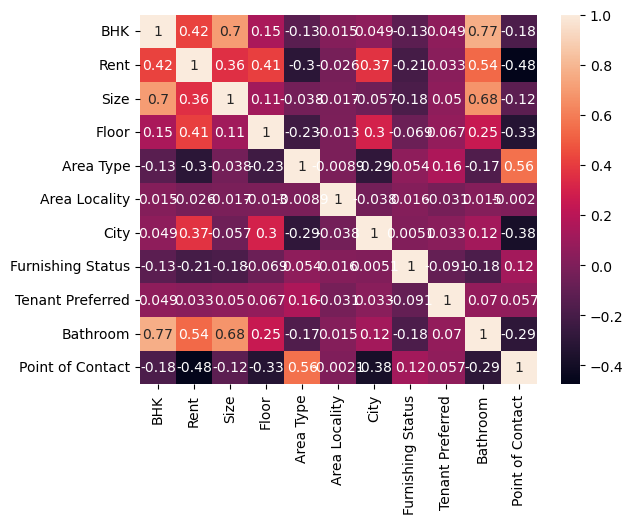

In [49]:
sns.heatmap(correlation, annot = True)

In [50]:
data.drop('Area Locality', axis = 1, inplace = True)
data.drop('Tenant Preferred', axis = 1, inplace = True)

In [51]:
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom,Point of Contact
0,2,10000,1100,0,2,4,2,2,2
1,2,20000,800,1,2,4,1,1,2
2,2,17000,1000,1,2,4,1,1,2
3,2,10000,800,1,2,4,2,1,2
4,2,7500,850,1,1,4,2,1,2
...,...,...,...,...,...,...,...,...,...
4538,2,15000,1000,3,1,3,1,2,2
4539,3,29000,2000,1,2,3,1,3,2
4540,3,35000,1750,3,1,3,1,3,0
4541,3,45000,1500,23,1,3,1,2,0


In [52]:
x = data.drop('Rent', axis = 1)
y = data['Rent']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 21)

In [54]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [55]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)
lr_train_score = lr.score(x_train, y_train)

rf = RandomForestRegressor(n_estimators=20, max_depth=3)
rf.fit(x_train, y_train)
rf_test_score = rf.score(x_test, y_test)
rf_train_score = rf.score(x_train, y_train)

dt= DecisionTreeRegressor(max_depth = 4)
dt.fit(x_train, y_train)
dt_test_score = dt.score(x_test, y_test)
dt_train_score = dt.score(x_train, y_train)

knn= KNeighborsRegressor(n_neighbors=25)
knn.fit(x_train, y_train)
knn_test_score = knn.score(x_test, y_test)
knn_train_score = knn.score(x_train, y_train)

ab = AdaBoostRegressor()
ab.fit(x_train, y_train)
ab_test_score = ab.score(x_test, y_test)
ab_train_score = ab.score(x_train, y_train)

gb = GradientBoostingRegressor(n_estimators = 27, max_depth=5)
gb.fit(x_train, y_train)
gb_test_score = gb.score(x_test, y_test)
gb_train_score = gb.score(x_train, y_train)

xb = XGBRegressor(max_depth=5, n_estimators=15)
xb.fit(x_train, y_train)
xb_test_score = xb.score(x_test, y_test)
xb_train_score = xb.score(x_train, y_train)

In [56]:
pd.DataFrame({'Model':['Linear Regression', 'Random Forest', 'Decision Tree', 'KNN', 'AdaBoost', 'GradientBoosting', 'XGB'],
             'Training Score':[lr_train_score, rf_train_score, dt_train_score, knn_train_score, ab_train_score, gb_train_score, xb_train_score],
             'Testing Score':[lr_test_score, rf_test_score, dt_test_score, knn_test_score, ab_test_score, gb_test_score, xb_test_score]})

,Model,Training Score,Testing Score
0,Linear Regression,0.471502,0.498771
1,Random Forest,0.685238,0.737550
2,Decision Tree,0.701317,0.710752
3,KNN,0.658796,0.693548
4,AdaBoost,0.666735,0.678334
5,GradientBoosting,0.824604,0.756969
6,XGB,0.831921,0.774835


In [57]:
y_pred = xb.predict(x_test)

In [58]:
y_pred

array([76935.1  , 48254.95 ,  8247.302, ...,  6392.336, 13015.028,
        9173.998], dtype=float32)

In [59]:
# pd.DataFrame({'True Value' : y_test, 'Predicted value' : y_pred})

In [60]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import accuracy_score

In [61]:
# model_params = {'rf' : {'model' : RandomForestRegressor(),
#                       'params' : {'n_estimators' : [2, 5, 10, 15, 20, 25, 30, 35, 40, 45]}},
#                'knn' : {'model' : KNeighborsRegressor(),
#                        'params' : {'n_neighbors' : [5, 7, 10, 15, 20, 25, 30, 35, 40, 45]}},
#                'dt' : {'model' : DecisionTreeRegressor(),
#                       'params' : {'max_depth' : [3, 4, 5, 7, 10]}},
#                'ab' : {'model' : AdaBoostRegressor(),
#                       'params' : {'n_estimators' : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}},
#                'gb' : {'model' : GradientBoostingRegressor(),
#                       'params' : {'max_depth' : [3, 4, 5, 7, 10],
#                                  'n_estimators' : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}},
#                'xb' : {'model' : XGBRegressor(),
#                       'params' : {'max_depth' : [3, 4, 5, 7, 10],
#                                  'n_estimators' : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}}}

In [62]:
# scores = []
# model_list = ['rf', 'knn', 'dt','ab', 'gb', 'xb']
# for model_name in model_list:
#     model_info = model_params[model_name]
#     gscv = GridSearchCV(model_info['model'], model_info['params'], cv = 5)
#     gscv.fit(x, y)
#     scores.append({'model' : model_name, 'best_score' : gscv.best_score_, 'best_params' : gscv.best_params_})

In [63]:
# pd.DataFrame(scores)

In [64]:
# print(scores)

In [65]:
# scores = []
# model_list = ['rf', 'knn', 'dt','ab', 'gb', 'xb']
# for model_name in model_list:
#     model_info = model_params[model_name]
#     rscv = RandomizedSearchCV(model_info['model'], model_info['params'], cv = 5, n_iter = 3, random_state = 3)
#     rscv.fit(x, y)
#     scores.append({'model' : model_name, 'best_score' : rscv.best_score_, 'best_params' : rscv.best_params_})

In [66]:
# pd.DataFrame(scores)